In [1]:
import pandas as pd

# Crime Stats
## Data visualization with Python and SQL, emphasis on functions
### by Josh Murray
### 9/24/2024

For this project, data was downloaded from the source, converted into a valid CSV, then brought into a MySQL database. In SQL, I used a window function ("LAG()" + "over") to capture the rate of change over time for each crime stat. 

In some other portfolio projects, I have worked with a relatively small set of plots and have contented myself to copy and paste as needed. Here, I wanted to demonstrate the ability to use loops and functions to efficiently perform the same task on multiple columns. 

Source: <https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/home>. Accessed 9/24/24, at which point it was last updated April 9, 2024.

Some notes from the sourcefile on the data:

1. Units = "Volume and Rate per 100,000 Inhabitants, 2004–2023". The crime figures have been "adjusted".
2. Populations are U.S. Census Bureau provisional estimates as of July 1 for each year except 2000 and 2010, which are decennial census counts.
3. The violent crime figures include the offenses of murder, rape (legacy definition), robbery, and aggravated assault.
4. The figures shown in this column for the offense of rape were estimated using the revised UCR definition of rape. See data declaration for further explanation.
5. The figures shown in this column for the offense of rape were estimated using the legacy UCR definition of rape. See data declaration for further explanation.
6. Although arson data are included in the trend and clearance tables, sufficient data are not available to estimate totals for this offense. Therefore, no arson data are published in this table.

*The source had no additional details on the meaning of "adjusted."*

Import and view data:

In [5]:
cs = pd.read_csv("C:/Users/joshc/Desktop/CPU Engineer Stuff/Project Datasets/CrimeStats/Crime_Rate_of_Change.csv")
cs.head()

,year,ViolentCrimeRate,ViolentCrimeRateChange,MurderRate,MurderRateChange,RapeRate,RapeRateChange,RapeOldDefRate,RapeOldDefRateChange,RobberyRate,...,AggAssaultRate,AggAssaultChange,PropertyCrimeRate,PropertyCrimeRateChange,BurgularyRate,BurgularyRateChange,TheftRate,TheftRateChange,VehicleTheftRate,VehicleTheftRateChange
0,2004,486.5,0.0,5.8,0.0,0.0,0.0,31.4,0.0,146.5,...,302.9,0.0,3590.0,0.0,743.6,0.0,2411,0,436,0
1,2005,492.8,6.3,6.0,0.2,0.0,0.0,31.0,-0.4,152.9,...,302.9,0.0,3513.3,-76.7,745.4,1.8,2334,-77,434,-2
2,2006,478.7,-14.1,5.8,-0.2,0.0,0.0,29.9,-1.1,150.8,...,292.2,-10.7,3347.8,-165.5,734.2,-11.2,2213,-121,400,-34
3,2007,476.7,-2.0,5.8,0.0,0.0,0.0,29.1,-0.8,151.1,...,290.7,-1.5,3305.0,-42.8,734.0,-0.2,2203,-10,368,-32
4,2008,459.9,-16.8,5.4,-0.4,0.0,0.0,28.1,-1.0,147.4,...,278.9,-11.8,3233.7,-71.3,739.7,5.7,2176,-27,318,-50


The next two blocks are creating the lists which will be used to make line graphs from our data. All x-axes are the "year" columns, and the different y-axes are the content of the other columns.

In [17]:
# Setting up lists, which will be needed for data visualization later. 
# First, the list of columns, which we will iterate through later. 
col_list = []
for col in cs.columns: 
    col_list.append(col)

In [23]:
# Next, a function and a loop which together populate a dictionary of lists
def col_content_to_list(col, df): # df = dataframe, col = column
    series = df[col]
    temp_list = []
    for item in series: 
        temp_list.append(item)
    return temp_list

crime_stat_list_dictionary = {}

for col in col_list: 
    temp_list_2 = col_content_to_list(col, cs)
    if col in crime_stat_list_dictionary.keys(): 
        continue
    else: 
        crime_stat_list_dictionary[col] = temp_list_2

#crime_stat_list_dictionary # success

The next two blocks are setup for plots. Importing the necessary library, setting figure size, and creating a filter to show only even years to keep the x-axis tick labels more legible. 

In [35]:
# Import resources needed to create plots: 
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 75

In [87]:
evenyears = lambda year: year%2 == 0
testfilter = filter(evenyears, crime_stat_list_dictionary['year'])
#for year in testfilter: print(year) #test success

Testing one set of graphs before looping through all: 

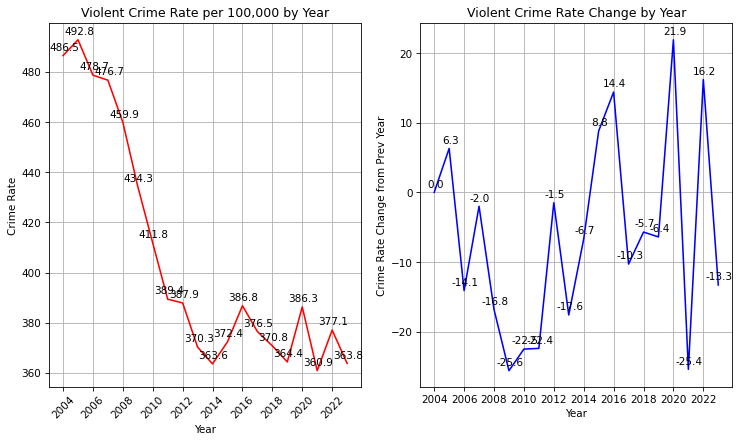

In [93]:
#Example of one line graph: 
from matplotlib import axis as ax


plt.subplot(1,2,1)
plt.plot(crime_stat_list_dictionary['year'], crime_stat_list_dictionary['ViolentCrimeRate'], color="red")
plt.title("Violent Crime Rate per 100,000 by Year")
plt.xlabel("Year")
xticksiter = filter(evenyears, crime_stat_list_dictionary['year'])
xtickslist = list(xticksiter)
plt.xticks(xtickslist)
plt.grid(which = 'major')
plt.ylabel("Crime Rate")

for x, y in zip(crime_stat_list_dictionary['year'], crime_stat_list_dictionary['ViolentCrimeRate']): 
    label = "{}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(1,5), ha="center")
plt.tick_params(axis="x", labelrotation=45)

#plt.show()
#plt.clf()
#print("\n")

plt.subplot(1,2,2)
plt.plot(crime_stat_list_dictionary['year'], crime_stat_list_dictionary['ViolentCrimeRateChange'], color="blue")
plt.title("Violent Crime Rate Change by Year")
plt.xlabel("Year")
plt.xticks(xtickslist)
plt.grid(which = 'major')
plt.ylabel("Crime Rate Change from Prev Year")

for x, y in zip(crime_stat_list_dictionary['year'], crime_stat_list_dictionary['ViolentCrimeRateChange']): 
    label = "{}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(1,5), ha="center")

plt.tight_layout()
plt.show()


Looping through our dictionary of columns to plot each graph. Changes I made for the loops: 

1. Skip the 'year' column
2. Change the title depending on whether it is a "Rate" or "Rate-of-change" stat.


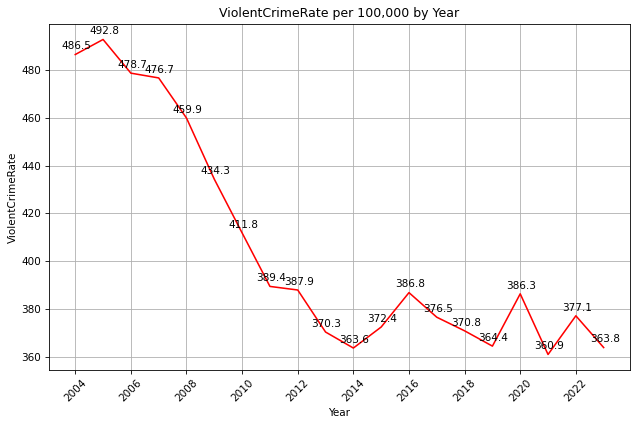


---



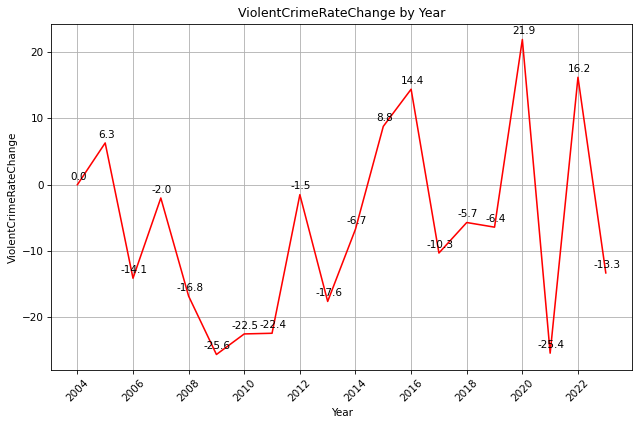


---



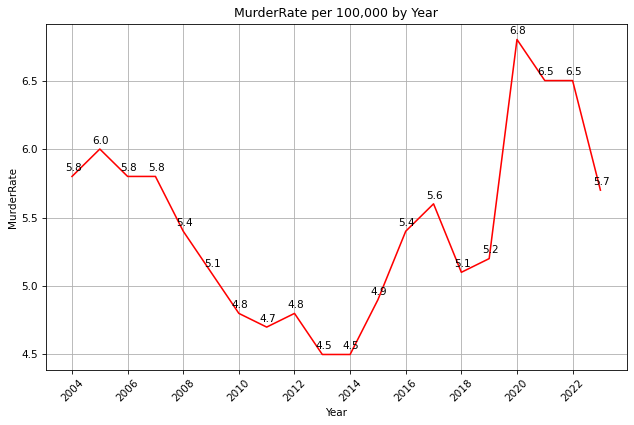


---



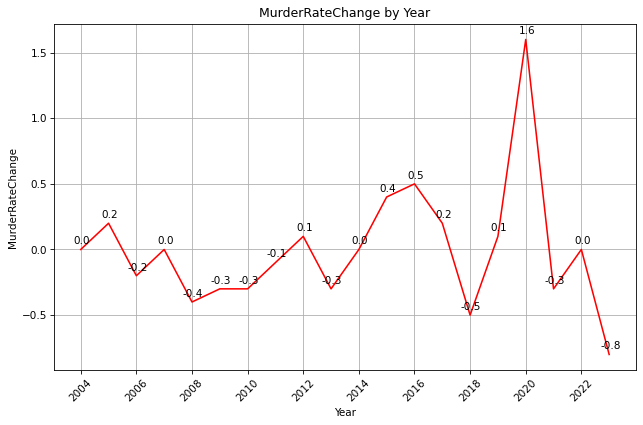


---



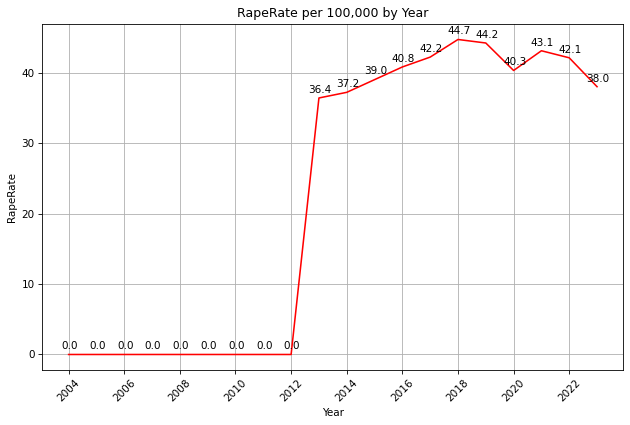


---



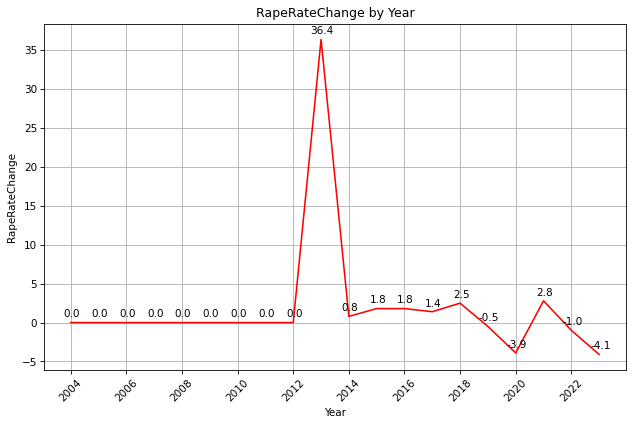


---



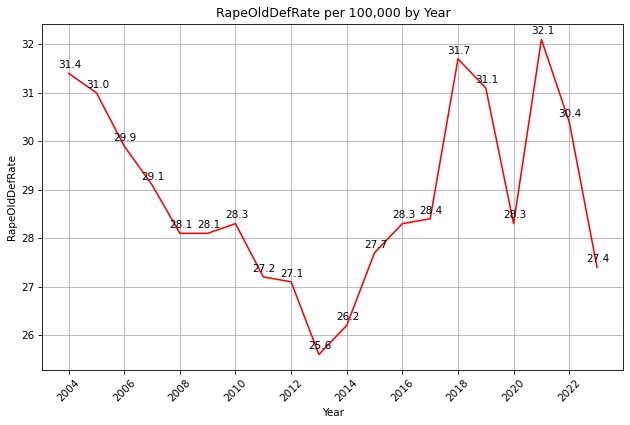


---



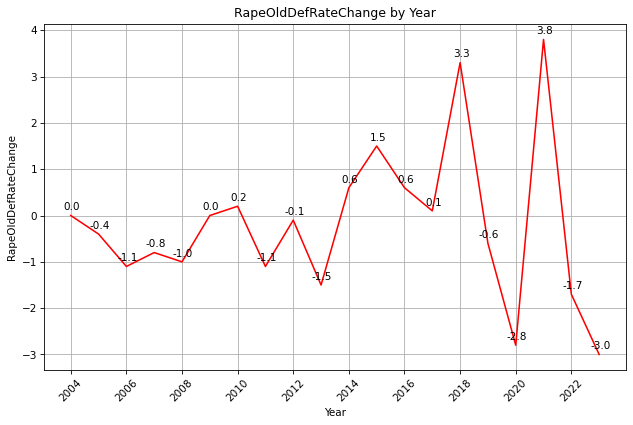


---



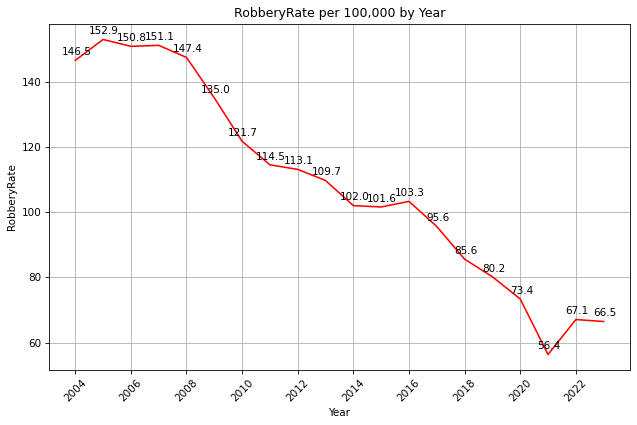


---



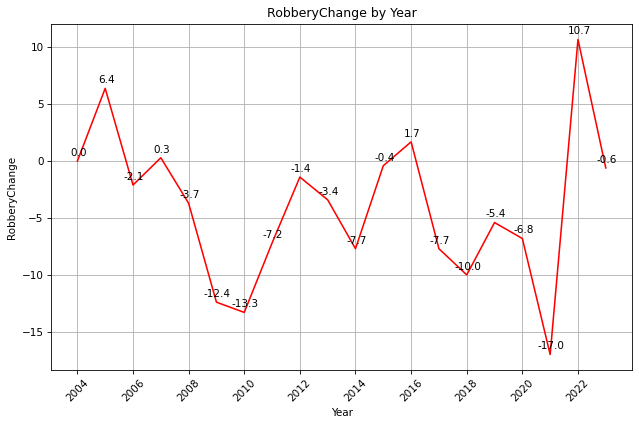


---



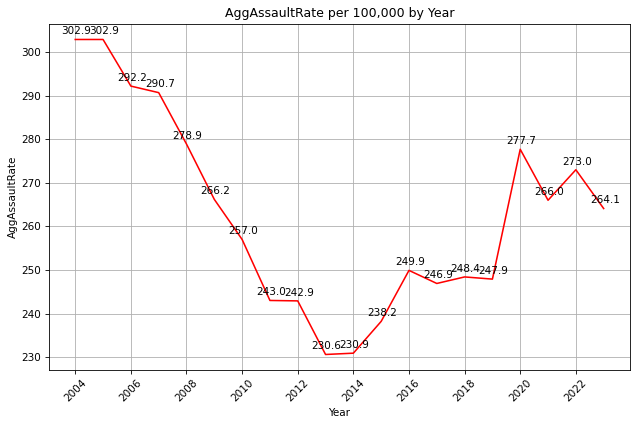


---



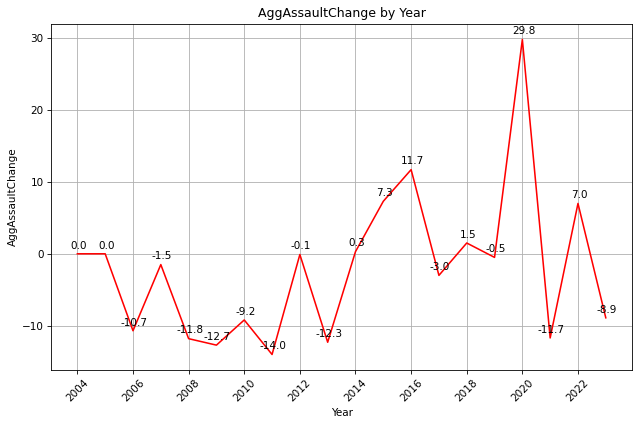


---



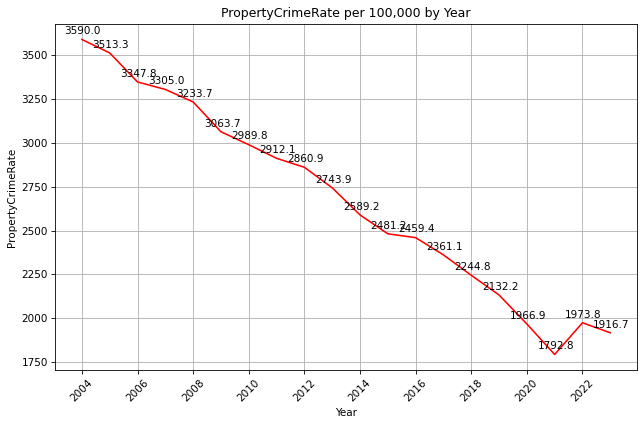


---



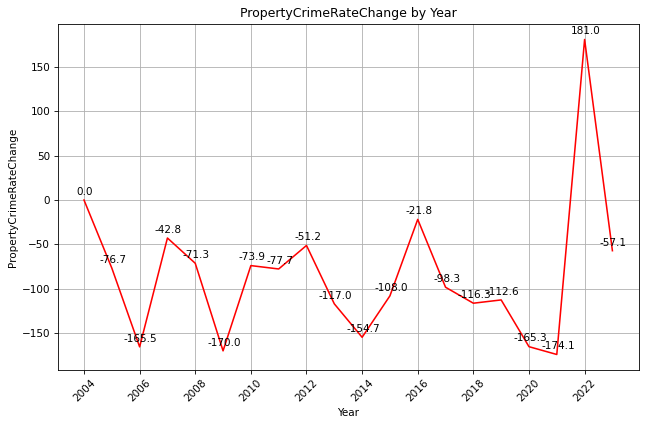


---



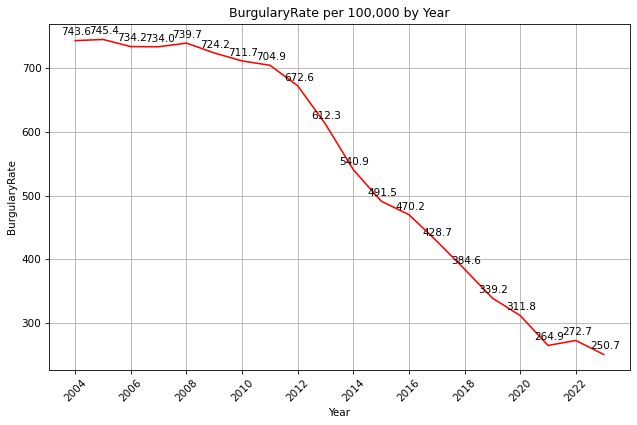


---



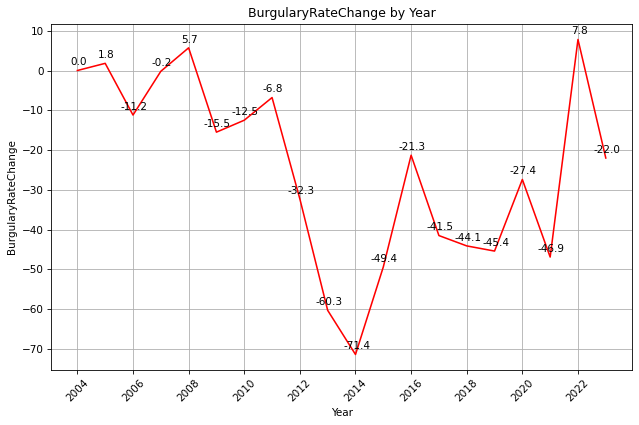


---



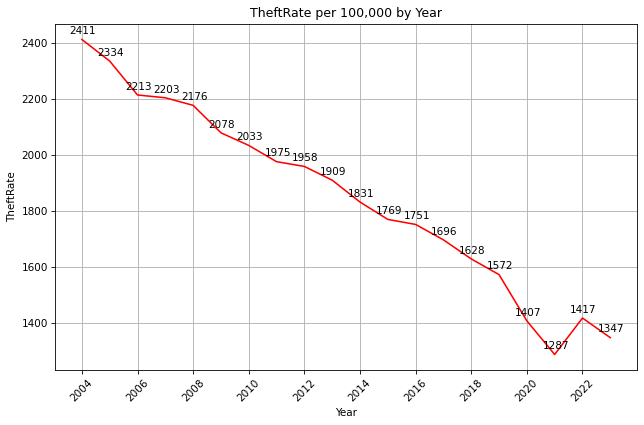


---



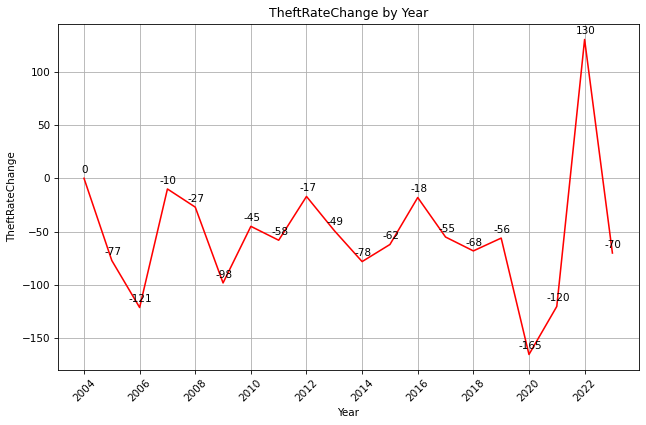


---



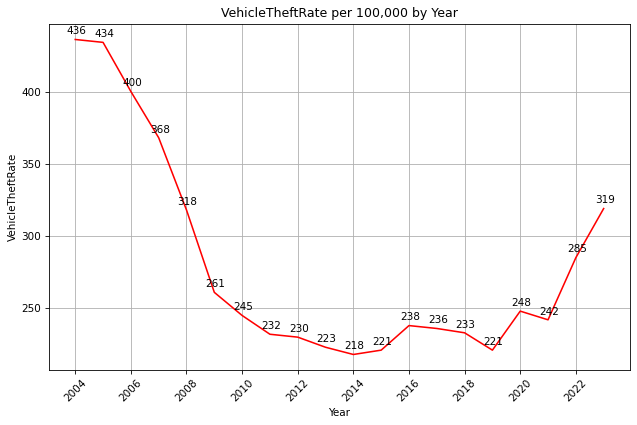


---



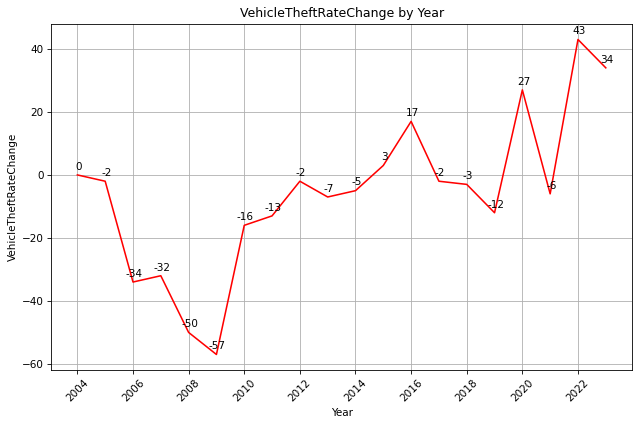


---



In [109]:
# printing all graphs with a loop: 

for stat in crime_stat_list_dictionary.keys(): 
    if stat != 'year': 
        plt.clf()
        plt.plot(crime_stat_list_dictionary['year'], crime_stat_list_dictionary[stat], color="red")
        if stat.find('Change') == -1:
            plt.title("{} per 100,000 by Year".format(stat))
        else:
            plt.title("{} by Year".format(stat))
        plt.xlabel("Year")
        xticksiter = filter(evenyears, crime_stat_list_dictionary['year'])
        xtickslist = list(xticksiter)
        plt.xticks(xtickslist)
        plt.grid(which = 'major')
        plt.ylabel(stat)
        for x, y in zip(crime_stat_list_dictionary['year'], crime_stat_list_dictionary[stat]): 
            label = "{}".format(y)
            plt.annotate(label, (x,y), textcoords="offset points", xytext=(1,5), ha="center")
        plt.tick_params(axis="x", labelrotation=45)
        plt.show()
        print("\n---\n")